# Techniques Avancées de Manipulation d'Images

Ce chapitre explore des techniques plus avancées de traitement d'images en utilisant NumPy et d'autres bibliothèques spécialisées. Nous aborderons l'analyse de la distribution des pixels via des histogrammes, l'ajustement de la luminosité et du contraste, l'application de filtres de convolution pour le lissage et la détection de contours, ainsi que la composition d'images.

In [3]:
# Importation des bibliothèques nécessaires
import numpy as np  # Manipulation de tableaux
import matplotlib.pyplot as plt  # Visualisation
from skimage import data, io  # Chargement d'images d'exemple
from scipy.ndimage import gaussian_filter, sobel  # Filtres de traitement d'image

---

## Chargement des images d'exemple

Nous utiliserons des images de la bibliothèque `scikit-image` pour illustrer les différentes techniques.

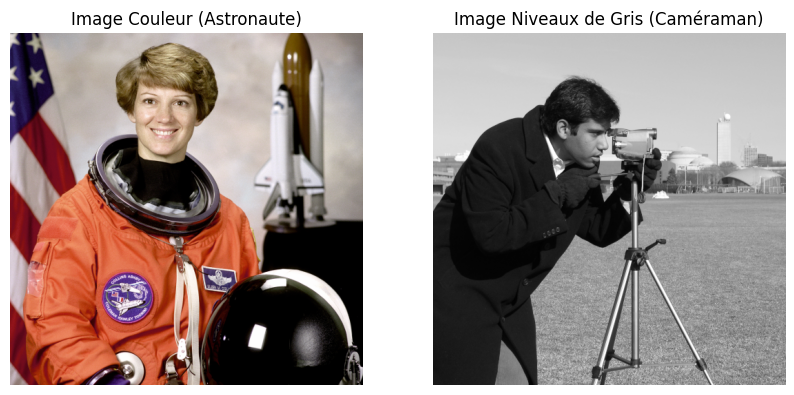

In [4]:
# Chargement d'images d'exemple depuis scikit-image
image_couleur = data.astronaut()  # Image couleur RGB
image_gris = data.camera()  # Image en niveaux de gris

# Affichage des deux images côte à côte
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Image couleur
axes[0].imshow(image_couleur)
axes[0].set_title("Image Couleur (Astronaute)")
axes[0].axis('off')  # Masquer les axes

# Image en niveaux de gris
axes[1].imshow(image_gris, cmap='gray')
axes[1].set_title("Image Niveaux de Gris (Caméraman)")
axes[1].axis('off')

plt.show()

---

## 1. Histogrammes : analyse de la distribution des pixels

Un histogramme d'image représente la distribution des intensités de pixels. C'est un outil essentiel pour évaluer la luminosité, le contraste et la gamme tonale d'une image. Pour le tracer, l'image 2D est d'abord "aplatie" en un tableau 1D avec la méthode `.ravel()`.

*Note : Nous utilisons l'image en niveaux de gris pour cet exemple.*

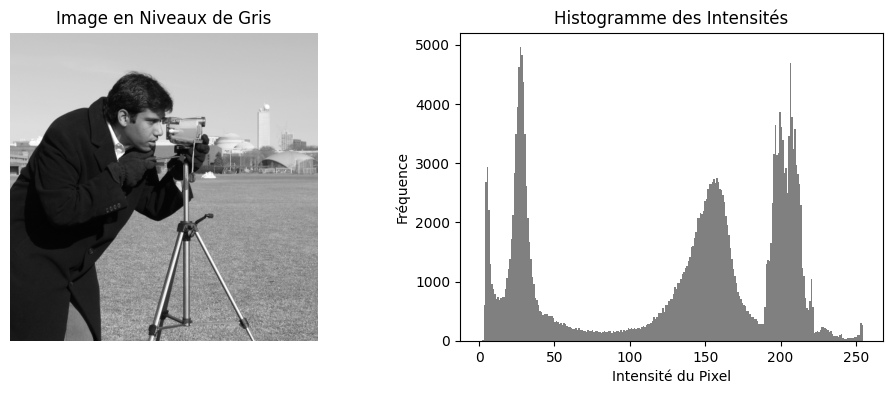

In [5]:
# Création de la figure avec deux sous-graphiques
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Affichage de l'image en niveaux de gris
axes[0].imshow(image_gris, cmap='gray')
axes[0].set_title("Image en Niveaux de Gris")
axes[0].axis('off')

# Calcul et affichage de l'histogramme
# .ravel() : convertit l'image 2D en tableau 1D
# bins=256 : 256 intervalles (un par valeur de pixel possible)
# range=(0, 255) : plage de valeurs attendues pour uint8
axes[1].hist(image_gris.ravel(), bins=256, range=(0, 255), color='gray')
axes[1].set_title("Histogramme des Intensités")
axes[1].set_xlabel("Intensité du Pixel")
axes[1].set_ylabel("Fréquence")

plt.show()

---

## 2. Ajustement de la luminosité et du contraste

Ces ajustements sont réalisés par des opérations arithmétiques directes sur les valeurs de pixels :

-   **Luminosité** : Ajout ou soustraction d'une constante à chaque pixel.
-   **Contraste** : Multiplication de chaque pixel par un facteur (supérieur à 1 pour augmenter, inférieur à 1 pour diminuer).

Il est essentiel d'utiliser `np.clip()` pour s'assurer que les valeurs de pixels restent dans l'intervalle valide (généralement `[0, 255]`).

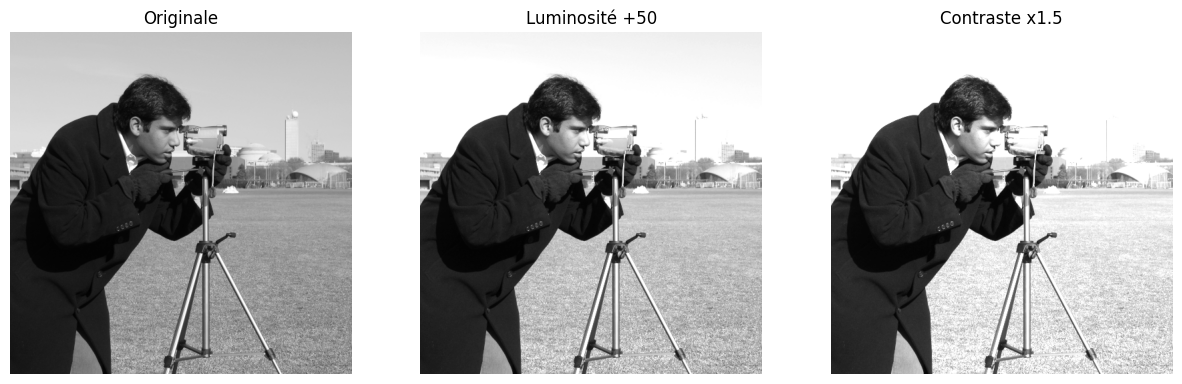

In [6]:
# Augmentation de la luminosité : addition d'une constante
# astype(int) : conversion en int pour éviter le débordement (overflow)
# np.clip() : limite les valeurs entre 0 et 255
# astype(np.uint8) : reconversion en uint8 pour l'affichage
image_plus_lumineuse = np.clip(image_gris.astype(int) + 50, 0, 255).astype(np.uint8)

# Augmentation du contraste : multiplication par un facteur
# astype(float) : nécessaire pour la multiplication décimale
image_plus_contrastee = np.clip(image_gris.astype(float) * 1.5, 0, 255).astype(np.uint8)

# Affichage des trois versions côte à côte
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Image originale
axes[0].imshow(image_gris, cmap='gray')
axes[0].set_title("Originale")
axes[0].axis('off')

# Image avec luminosité augmentée
axes[1].imshow(image_plus_lumineuse, cmap='gray')
axes[1].set_title("Luminosité +50")
axes[1].axis('off')

# Image avec contraste augmenté
axes[2].imshow(image_plus_contrastee, cmap='gray')
axes[2].set_title("Contraste x1.5")
axes[2].axis('off')

plt.show()

---

## 3. Filtres de Convolution : Flou Gaussien

La convolution est une opération fondamentale en traitement d'images où chaque pixel de sortie est calculé comme une moyenne pondérée des pixels voisins de l'entrée. Elle est à la base de nombreux filtres.

Le **filtre gaussien** est un filtre de lissage qui réduit le bruit et adoucit les transitions. Son intensité est contrôlée par le paramètre `sigma`.

*Note : Nous utilisons la fonction `gaussian_filter` du module `scipy.ndimage`.*

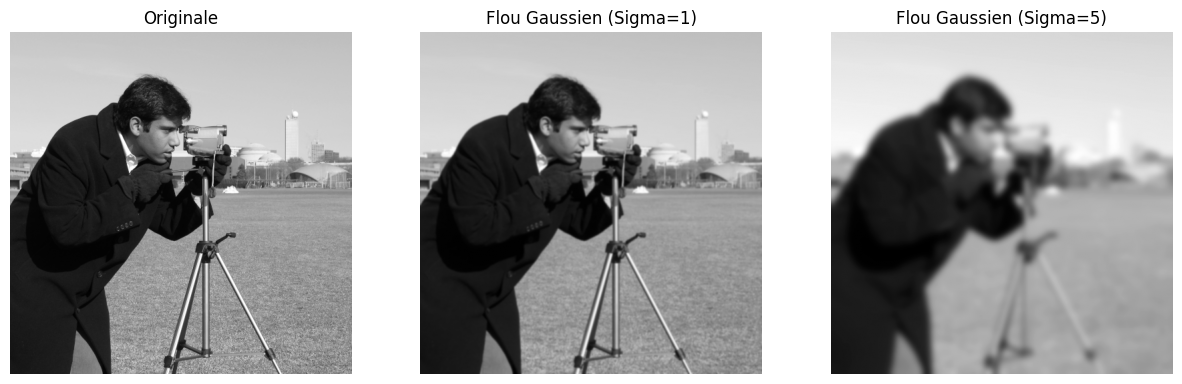

In [7]:
# Application du flou gaussien avec différents niveaux d'intensité
# sigma=1 : flou léger, préserve les détails
# sigma=5 : flou prononcé, lisse fortement l'image
image_floue_1 = gaussian_filter(image_gris, sigma=1)
image_floue_5 = gaussian_filter(image_gris, sigma=5)

# Affichage des trois versions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Image originale
axes[0].imshow(image_gris, cmap='gray')
axes[0].set_title("Originale")
axes[0].axis('off')

# Flou léger
axes[1].imshow(image_floue_1, cmap='gray')
axes[1].set_title("Flou Gaussien (Sigma=1)")
axes[1].axis('off')

# Flou prononcé
axes[2].imshow(image_floue_5, cmap='gray')
axes[2].set_title("Flou Gaussien (Sigma=5)")
axes[2].axis('off')

plt.show()

---

## 4. Détection de Contours (Filtre de Sobel)

La détection de contours vise à identifier les régions d'une image où les changements d'intensité sont abrupts. Le **filtre de Sobel** est un opérateur de détection de contours classique qui calcule une approximation du gradient d'intensité de l'image.

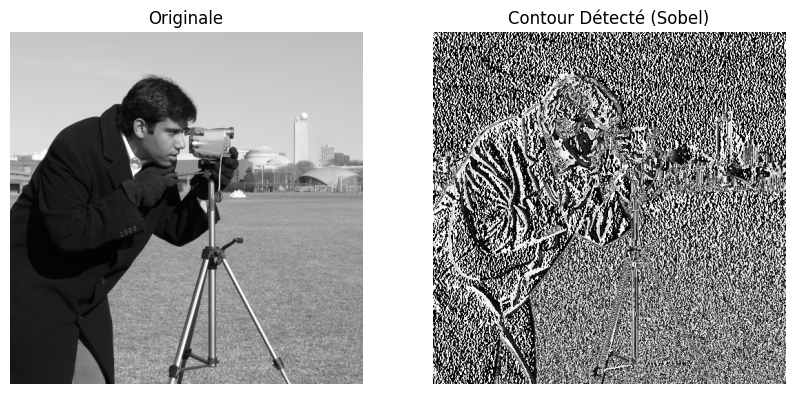

In [8]:
# Application du filtre de Sobel pour détecter les contours
# sobel() : calcule le gradient d'intensité (changements brusques)
# Les contours apparaissent en blanc (gradient élevé)
contours = sobel(image_gris)

# Affichage de l'image originale et des contours détectés
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Image originale
axes[0].imshow(image_gris, cmap='gray')
axes[0].set_title("Originale")
axes[0].axis('off')

# Contours détectés
axes[1].imshow(contours, cmap='gray')
axes[1].set_title("Contour Détecté (Sobel)")
axes[1].axis('off')

plt.show()

---

## 5. Composition d'Images (Blending)

La composition d'images, ou *blending*, consiste à fusionner deux images en calculant une moyenne pondérée de leurs valeurs de pixels. Cela permet de créer des effets de transparence ou de superposition.

La formule générale est : `image_resultat = image1 * alpha + image2 * (1 - alpha)`, où `alpha` est le facteur de mélange (entre 0 et 1).

*Note : Les deux images doivent avoir les mêmes dimensions pour cette opération.*

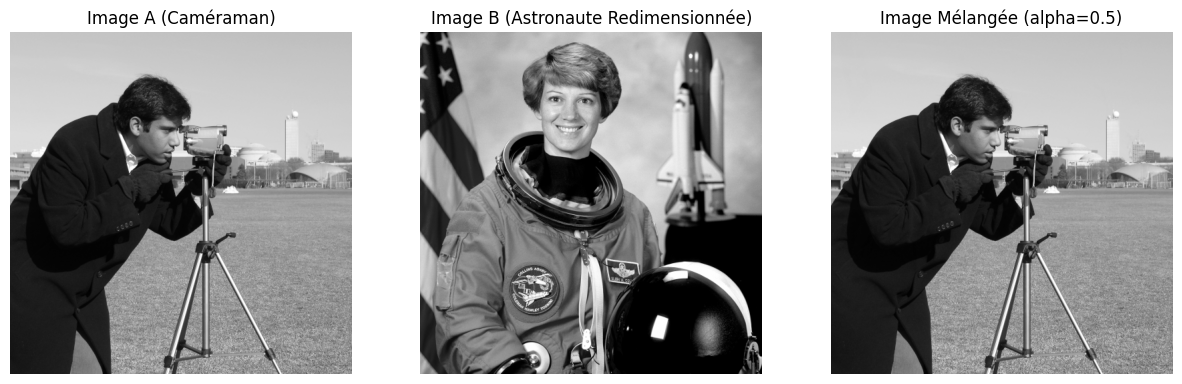

In [9]:
from skimage.transform import resize
from skimage.color import rgb2gray

# Chargement et préparation de deux images pour la composition
image_a = data.camera()
image_b_orig = data.astronaut()

# Conversion de l'image couleur en niveaux de gris
image_b_gris = rgb2gray(image_b_orig)

# Redimensionnement pour avoir les mêmes dimensions
image_b_redimensionnee = resize(image_b_gris, image_a.shape)

# Composition avec pondération (alpha blending)
# alpha=0.5 : mélange équilibré (50% de chaque image)
# alpha=0.7 : 70% image_a, 30% image_b
alpha = 0.5
image_melangee = (image_a * alpha + image_b_redimensionnee * (1 - alpha))

# Affichage des trois images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Image A
axes[0].imshow(image_a, cmap='gray')
axes[0].set_title("Image A (Caméraman)")
axes[0].axis('off')

# Image B
axes[1].imshow(image_b_redimensionnee, cmap='gray')
axes[1].set_title("Image B (Astronaute)")
axes[1].axis('off')

# Image composée
axes[2].imshow(image_melangee, cmap='gray')
axes[2].set_title(f"Mélange (alpha={alpha})")
axes[2].axis('off')

plt.show()